# Plots

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import json

def plot(title, x, y_arrays, labels, colors=None, linestyles=None, markers=None, *, xlabel="", ylabel="", filename=None, legend_position="best", **plot_args):
    """
    Plot the data and create the plot image.

    Parameters
    ----------
    title: string, name of the plot
    x: array, x values
    y_arrays: list of array, differents series of data to plot
    labels: list, names of the data series
    """
    plt.figure()

    x = np.array(x)

    for i, (value, label) in enumerate(zip(y_arrays, labels)):
        linestyle = linestyles[i] if linestyles is not None else None
        marker = markers[i] if markers is not None else None
        color = colors[i] if colors is not None else None

        value = np.array(value)
        plt.plot(x, value, label=label, linestyle=linestyle, color=color, marker=marker, **plot_args)

    plt.title(title)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend(loc=legend_position)
    plt.savefig("./plots/" + (filename or title) + ".jpg", dpi = 150, bbox_inches = 'tight')
    plt.show()

def parseJSON(filename):
    """
    Read an artifact JSON file.

    Parameters
    ----------
    filename : str, path of the .JSON file containing the data

    Returns
    -------
    Tuple[int, int, flaot, List[float]]
        value of K, value of E, value of alpha and the list of accuracies trimmed to the first 100
    """
    # print(filename)
    dict = {}
    with open(filename) as f:
        dict = json.load(f)

    K = None
    E = None
    alpha = None
    accuracies = None
    if "config" in dict.keys():
        if "K" in dict["config"]:
            K = dict["config"]["K"]
        if "E" in dict["config"]:
            E = dict["config"]["E"]
        else:
            E = dict["config"]["EPOCH"]
    if "alpha" in dict.keys():
        alpha = dict["alpha"]
    if "accuracy" in dict.keys():
        accuracies = dict["accuracy"][:NUMBER_OF_POINTS]

    return K, E, alpha, accuracies

The following cells are for generating the different plots

In [164]:
ACCURACY_SCALE = 25 # This is because we compute the accuracies only every 25 iterations of the code, 1 for Centralized

NUMBER_OF_POINTS = 100 # 100 for FedAvg plots, 75 for FedDyn, 300 for Centralized

x = np.array(range(NUMBER_OF_POINTS))*ACCURACY_SCALE # x axis

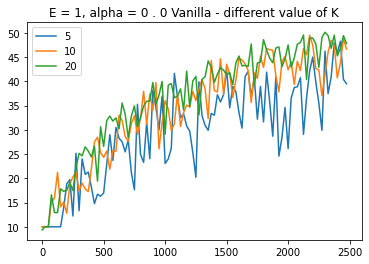

In [165]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_0.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_0.0_E_1_K_10.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/ALPHA_0.0_E_1_K_20.json")

plot(f"E = {E}, alpha = {alpha} Vanilla - different value of K", x, [accuracies, accuracies_1, accuracies_2], [K, K1, K2])

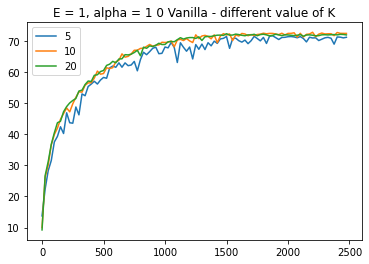

In [166]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_10.0_E_1_K_10.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/ALPHA_10.0_E_1_K_20.json")

plot(f"E = {E}, alpha = {alpha} Vanilla - different value of K", x, [accuracies, accuracies_1, accuracies_2], [K, K1, K2])

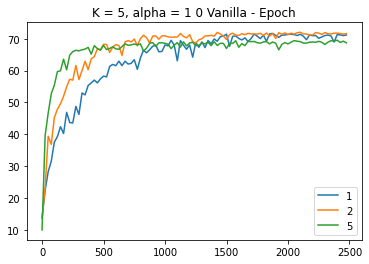

In [167]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_10.0_E_2_K_5.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/ALPHA_10.0_E_5_K_5.json")

plot(f"K = {K}, alpha = {alpha} Vanilla - Epoch", x, [accuracies, accuracies_1, accuracies_2], [E, E1, E2])

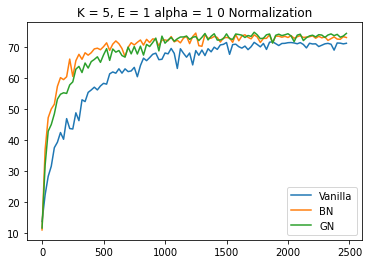

In [168]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_10.0_E_1_K_5_BN.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/ALPHA_10.0_E_1_K_5_GN.json")

plot(f"K = {K}, E = {E} alpha = {alpha} Normalization", x, [accuracies, accuracies_1, accuracies_2], ["Vanilla", "BN", "GN"])

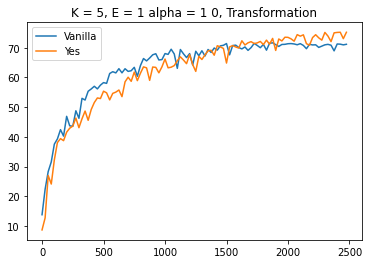

In [169]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_10.0_E_1_K_5_T.json")

plot(f"K = {K}, E = {E} alpha = {alpha}, Transformation", x, [accuracies, accuracies_1], ["Vanilla", "Yes"])

# FedDyn vs FedAvg
For do this part we edit the number of point from 100 iterations to 60, just because we limit to 1500 iterations on FedDyn.

In [170]:
#NUMBER_OF_POINTS = 60 
#ACCURACY_SCALE = 25
#x = np.array(range(NUMBER_OF_POINTS)) * ACCURACY_SCALE

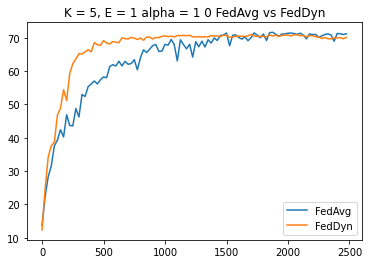

In [171]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/FEDDYN_ALPHA_0.001_ALPHA_10.0_E_1_K_5.json")

plot(f"K = {K}, E = {E} alpha = {alpha} FedAvg vs FedDyn", x, [accuracies, accuracies_1], ["FedAvg", "FedDyn"])

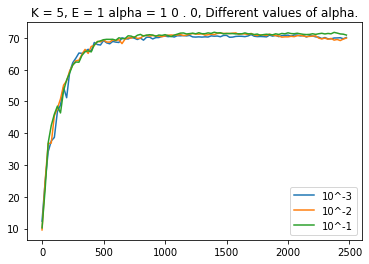

In [172]:
# Comparison different values of alpha
K, E, alpha, accuracies = parseJSON("artifacts/FEDDYN_ALPHA_0.001_ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/FEDDYN_ALPHA_0.01_ALPHA_10.0_E_1_K_5.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/FEDDYN_ALPHA_0.1_ALPHA_10.0_E_1_K_5.json")

plot(f"K = {K}, E = {E} alpha = {alpha}, Different values of alpha.", x, [accuracies, accuracies_1, accuracies_2], ["10^-3", "10^-2", "10^-1"])

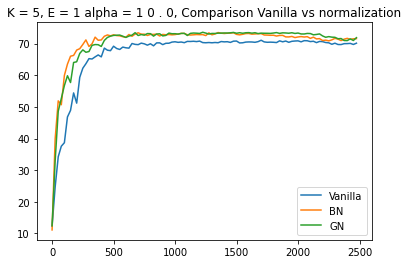

In [173]:
# Comparison different values of standard vs batch normalization vs group normalization
K, E, alpha, accuracies = parseJSON("artifacts/FEDDYN_ALPHA_0.001_ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/FEDDYN_ALPHA_0.001_ALPHA_10.0_E_1_K_5_BN.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/FEDDYN_ALPHA_0.001_ALPHA_10.0_E_1_K_5_GN.json")

plot(f"K = {K}, E = {E} alpha = {alpha}, Comparison Vanilla vs normalization", x, [accuracies, accuracies_1, accuracies_2], ["Vanilla", "BN", "GN"])

## Summary comparison

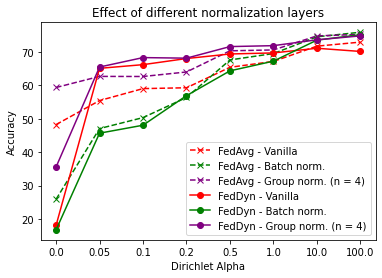

In [174]:
dirichlet_alphas = ["0.0", "0.05", "0.1", "0.2", "0.5", "1.0", "10.0", "100.0"]
trim_at = 100 # 2500 rounds

# Vanilla case
files = [f"artifacts/ALPHA_{alpha}_E_1_K_5.json" for alpha in dirichlet_alphas]
vanilla_accuracies = [max(parseJSON(file)[3][:trim_at]) for file in files]

# Batch normalization
files = [f"artifacts/ALPHA_{alpha}_E_1_K_5_BN.json" for alpha in dirichlet_alphas]
bn_accuracies = [max(parseJSON(file)[3][:trim_at]) for file in files]

# Group normalization
files = [f"artifacts/ALPHA_{alpha}_E_1_K_5_GN.json" for alpha in dirichlet_alphas]
gn_accuracies = [max(parseJSON(file)[3][:trim_at]) for file in files]

# [FedDyn] Vanilla case
files = [f"artifacts/FEDDYN_ALPHA_0.001_ALPHA_{alpha}_E_1_K_5.json" for alpha in dirichlet_alphas]
feddyn_vanilla_accuracies = [max(parseJSON(file)[3][:trim_at]) for file in files]

# [FedDyn] Batch normalization
files = [f"artifacts/FEDDYN_ALPHA_0.001_ALPHA_{alpha}_E_1_K_5_BN.json" for alpha in dirichlet_alphas]
feddyn_bn_accuracies = [max(parseJSON(file)[3][:trim_at]) for file in files]

# [FedDyn] Group normalization
files = [f"artifacts/FEDDYN_ALPHA_0.001_ALPHA_{alpha}_E_1_K_5_GN.json" for alpha in dirichlet_alphas]
feddyn_gn_accuracies = [max(parseJSON(file)[3][:trim_at]) for file in files]

# Transformations
# files = [f"artifacts/ALPHA_{alpha:.1f}_E_1_K_5_T.json" for alpha in dirichlet_alphas]
# transf_accuracies = [max(parseJSON(file)[3]) for file in files]

dirichlet_alphas = [f"{alpha}" for alpha in dirichlet_alphas]
plot("Effect of different normalization layers", 
    dirichlet_alphas, 
    [vanilla_accuracies, bn_accuracies, gn_accuracies, feddyn_vanilla_accuracies, feddyn_bn_accuracies, feddyn_gn_accuracies], 
    ["FedAvg - Vanilla", "FedAvg - Batch norm.", "FedAvg - Group norm. (n = 4)", "FedDyn - Vanilla", "FedDyn - Batch norm.", "FedDyn - Group norm. (n = 4)"],
    linestyles=['dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid'],
    colors=['red', 'green', 'purple', 'red', 'green', 'purple'],
    markers=['x', 'x', 'x', 'o', 'o', 'o'],
    xlabel="Dirichlet Alpha",
    ylabel="Accuracy",
    filename="fedavg_feddyn_accuracy_vs_norm_layers.png",
    legend_position="lower right",
)

## Centralized Model
For do this part we edit the number of point from 100 iterations to 300, just because we limit to 300 epochs.

In [175]:
ACCURACY_SCALE = 1
NUMBER_OF_POINTS = 300

x = np.array(range(NUMBER_OF_POINTS)) * ACCURACY_SCALE

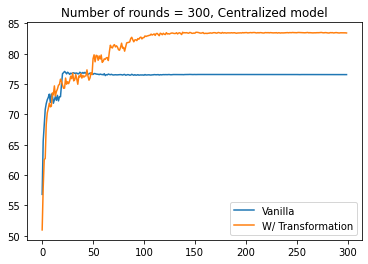

In [176]:
_, E, alpha, accuracies = parseJSON("artifacts/ALPHA_Centralized-Model.json")
_, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_Centralized-Model_T.json")

plot(f"Number of rounds = {E}, Centralized model", x, [accuracies, accuracies_1], ["Vanilla", "W/ Transformation"])

## Client class distributions

In [177]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

def parse_csv(filename, client_id):
    """Read a CIFAR-10 splits file

    Parameters
    ----------
    filename : str
        path of the .csv file containing the splits

    Returns
    -------
    Tuple[DefaultDict[int, List[int]], Dict[int, int]]
        the dictionary containing the splits as user_id:[image_id]
        and the labels_mapping as image_id:label
    """
    splits = defaultdict(lambda: [])
    labels_mapping = dict()

    with open(filename) as f:
        for line in f:
            if not line[0].isdigit():
                # Skip the first line
                continue

            user_id, image_id, label = (int(token) for token in line.split(","))
            if user_id == client_id:
                splits[user_id].append(image_id)
                labels_mapping[image_id] = label

    return splits, labels_mapping


NUMBER_OF_CLASSES = 10

def heatmap(title, client_ids, client_labels, values):
    _, ax = plt.subplots()
    _ = plt.imshow(values)
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(NUMBER_OF_CLASSES))
    ax.set_xticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
    ax.set_yticks(np.arange(len(client_ids)))
    ax.set_yticklabels(client_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(client_ids)):
        for j in range(NUMBER_OF_CLASSES):
            _ = ax.text(j, i, int(values[i][j]),
                        ha="center", va="center", color="w")

    ax.set_title(title)
    plt.savefig("./plots/" + title + ".jpg", dpi = 150, bbox_inches = 'tight')
    plt.show()

In [178]:
def heatmap_wrapper(alpha):
    _, labels_0 = parse_csv(f"cifar10/federated_train_alpha_{alpha:.2f}.csv", 0)
    _, labels_10 = parse_csv(f"cifar10/federated_train_alpha_{alpha:.2f}.csv", 10)
    _, labels_30 = parse_csv(f"cifar10/federated_train_alpha_{alpha:.2f}.csv", 30)
    _, labels_60 = parse_csv(f"cifar10/federated_train_alpha_{alpha:.2f}.csv", 60)
    _, labels_90 = parse_csv(f"cifar10/federated_train_alpha_{alpha:.2f}.csv", 90)


    classes_0 = np.zeros(NUMBER_OF_CLASSES)
    for l in labels_0.values():
        classes_0[l] += 1
    classes_10 = np.zeros(NUMBER_OF_CLASSES)
    for l in labels_10.values():
        classes_10[l] += 1
    classes_30 = np.zeros(NUMBER_OF_CLASSES)
    for l in labels_30.values():
        classes_30[l] += 1
    classes_60 = np.zeros(NUMBER_OF_CLASSES)
    for l in labels_60.values():
        classes_60[l] += 1
    classes_90 = np.zeros(NUMBER_OF_CLASSES)
    for l in labels_90.values():
        classes_90[l] += 1

    heatmap(f"Client class distribution with alpha = {alpha}", 
        [0, 10, 30, 60, 90], 
        ["0", "10", "30", "60", "90"], 
        [classes_0, classes_10, classes_30, classes_60, classes_90])

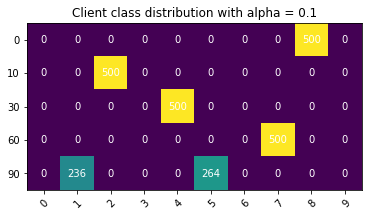

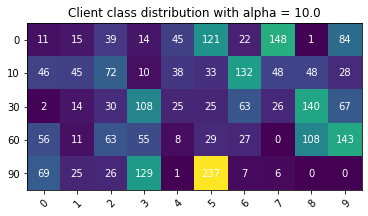

In [179]:
heatmap_wrapper(0.10)
heatmap_wrapper(10.0)

## Tables generation

### Comparison of different normalization layers in FedAvg

In [180]:
dirichlet_alphas = [None, "0.0", "0.05", "0.1", "0.2", "0.5", "1.0", "10.0", "100.0"]
norm_layers_header = ["w/o", "BN", "GN"]
norm_layers = ["", "_BN", "_GN"]
trim_at = 100 # 2500 rounds

print("Table: effect of batch normalization and group normalization\n")
print("Dirichlet\t" + "\t\t".join(norm_layers_header))
for alpha in dirichlet_alphas:
    row_accuracies = []
    for norm in norm_layers:
        if alpha is None:
            _, _, _, accuracies = parseJSON(f"artifacts/IID_E_1_K_5{norm}.json") 
        else:
            _, _, _, accuracies = parseJSON(f"artifacts/ALPHA_{alpha}_E_1_K_5{norm}.json") 
        
        row_accuracies.append(max(accuracies[:trim_at]))
    print(f"{alpha}\t\t" + "\t\t".join(map(lambda x: f"{x:.2f}", row_accuracies)))

Table: effect of batch normalization and group normalization

Dirichlet	w/o		BN		GN
None		73.46		75.23		75.43
0.0		48.23		25.89		59.32
0.05		55.41		47.04		62.64
0.1		58.99		50.32		62.61
0.2		59.24		56.33		63.96
0.5		65.36		67.56		70.29
1.0		67.12		69.47		70.55
10.0		71.68		74.48		74.75
100.0		72.89		75.84		75.19


### Comparison of different participation levels in FedAvg

In [181]:
dirichlet_alphas = [None, "0.0", "0.05", "0.1", "0.2", "0.5", "1.0", "10.0", "100.0"]
participations = [5, 10, 20]
trim_at = 100 # 2500 rounds

print("Table: different client participation levels\n")
print("Dirichlet\t" + "\t\t".join(map(str, participations)))

for alpha in dirichlet_alphas:
    row_accuracies = []
    for participation in participations:
        if alpha is None:
            _, _, _, accuracies = parseJSON(f"artifacts/IID_E_1_K_{participation}.json") 
        else:
            _, _, _, accuracies = parseJSON(f"artifacts/ALPHA_{alpha}_E_1_K_{participation}.json") 
        
        row_accuracies.append(max(accuracies[:trim_at]))
    print(f"{alpha}\t\t" + "\t\t".join(map(lambda x: f"{x:.2f}", row_accuracies)))

Table: different client participation levels

Dirichlet	5		10		20
None		73.46		74.43		74.12
0.0		48.23		49.50		50.11
0.05		55.41		57.27		58.08
0.1		58.99		59.21		59.04
0.2		59.24		61.13		62.10
0.5		65.36		67.14		67.28
1.0		67.12		69.18		69.33
10.0		71.68		72.81		72.34
100.0		72.89		73.45		73.91


### Comparison of different values of alpha in FedDyn

In [184]:
dirichlet_alphas = [None, "0.0", "0.05", "0.1", "0.2", "0.5", "1.0", "10.0", "100.0"]
feddyn_alphas = ["0.001", "0.01", "0.1"]
trim_at = 100 # 2500 rounds

print("Table: different values of FedDyn alpha\n")
print("Dirichlet\t" + "\t\t".join(map(str, participations)))

for alpha in dirichlet_alphas:
    row_accuracies = []
    for feddyn_alpha in feddyn_alphas:
        if alpha is None:
            _, _, _, accuracies = parseJSON(f"artifacts/FEDDYN_ALPHA_{feddyn_alpha}_iid_E_1_K_5.json") 
        else:
            _, _, _, accuracies = parseJSON(f"artifacts/FEDDYN_ALPHA_{feddyn_alpha}_ALPHA_{alpha}_E_1_K_5.json") 
        
        row_accuracies.append(max(accuracies[:trim_at]))
    print(f"{alpha}\t\t" + "\t\t".join(map(lambda x: f"{x:.2f}", row_accuracies)))

Table: different values of FedDyn alpha

Dirichlet	5		10		20
None		70.94		70.74		71.69
0.0		18.07		20.73		20.26
0.05		65.05		64.45		65.45
0.1		66.15		67.74		67.26
0.2		67.98		68.30		67.56
0.5		69.34		69.41		69.85
1.0		69.66		69.35		71.03
10.0		71.05		71.58		71.78
100.0		70.10		71.18		71.82
